# Importing libraries and dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('indian_liver_patient.csv')

##     

# ---------------------------------Data Cleaning----------------------------------------

### Understanding the dataset

In [327]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [328]:
df.shape

(583, 11)

In [329]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [330]:
df.columns


Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### Checking for outliers

<AxesSubplot:xlabel='Age'>

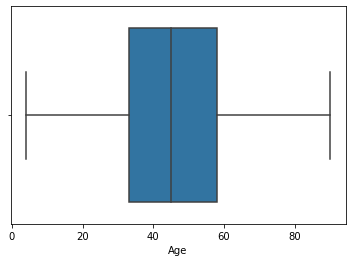

In [332]:
# checking for outliers
import seaborn as sns
sns.boxplot(x=df['Age'])

<AxesSubplot:xlabel='Total_Bilirubin'>

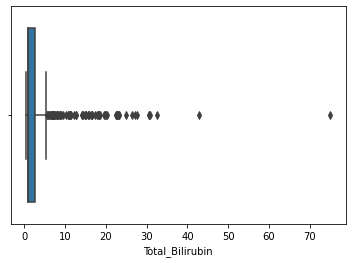

In [333]:
sns.boxplot(x=df['Total_Bilirubin'])


<AxesSubplot:xlabel='Direct_Bilirubin'>

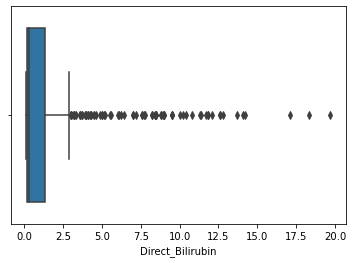

In [334]:
sns.boxplot(x=df['Direct_Bilirubin'])

<AxesSubplot:xlabel='Alkaline_Phosphotase'>

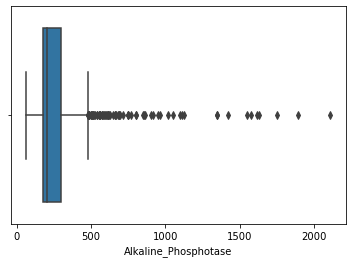

In [335]:
sns.boxplot(x=df['Alkaline_Phosphotase'])

<AxesSubplot:xlabel='Alamine_Aminotransferase'>

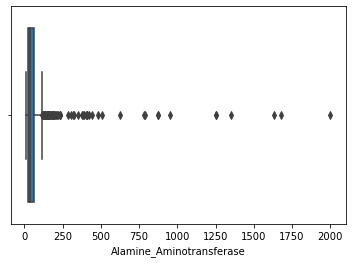

In [336]:
sns.boxplot(x=df['Alamine_Aminotransferase'])

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

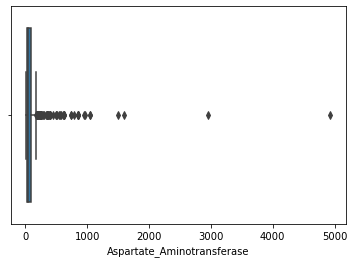

In [337]:
sns.boxplot(x=df['Aspartate_Aminotransferase'])

<AxesSubplot:xlabel='Total_Protiens'>

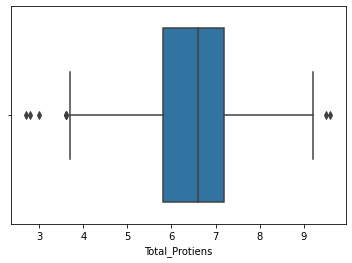

In [338]:
sns.boxplot(x=df['Total_Protiens'])

<AxesSubplot:xlabel='Albumin'>

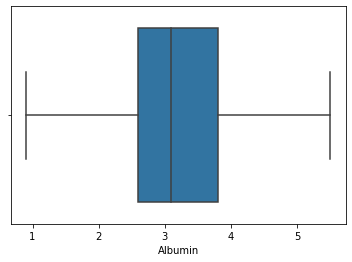

In [339]:
sns.boxplot(x=df['Albumin'])

<AxesSubplot:xlabel='Albumin_and_Globulin_Ratio'>

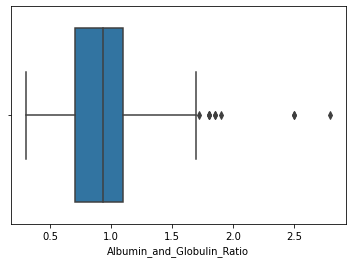

In [340]:
sns.boxplot(x=df['Albumin_and_Globulin_Ratio'])

In [4]:
z = np.abs(stats.zscore(df[['Total_Bilirubin',
                            'Direct_Bilirubin',
                            'Alkaline_Phosphotase',
                            'Alamine_Aminotransferase',
                            'Aspartate_Aminotransferase',
                            'Total_Protiens',
                            ]]))
z

array([[0.41887783, 0.49396398, 0.42671496, 0.35466541, 0.31839333,
        0.29211961],
       [1.22517135, 1.43042334, 1.68262856, 0.09159933, 0.03433257,
        0.93756634],
       [0.6449187 , 0.93150811, 0.82158795, 0.11352151, 0.14518555,
        0.47653296],
       ...,
       [0.4027597 , 0.45832717, 0.18776589, 0.17928803, 0.21100451,
        0.0767071 ],
       [0.32216906, 0.35141677, 0.43907439, 0.28341834, 0.26989515,
        0.29211961],
       [0.37052344, 0.42269037, 0.30724042, 0.32726269, 0.2976084 ,
        0.75315299]])

In [5]:
threshold = 3
print(np.where(z > 3))

(array([ 25,  26,  27,  47,  77, 115, 116, 117, 117, 118, 118, 119, 119,
       120, 120, 121, 121, 128, 135, 135, 135, 161, 166, 168, 168, 177,
       180, 181, 195, 199, 199, 199, 199, 199, 207, 207, 233, 259, 259,
       269, 311, 311, 370, 370, 419, 420, 429, 447, 447, 447, 452, 479,
       503, 504, 504, 505, 505, 509, 519, 519, 531, 531, 546, 547, 547,
       559, 559, 565, 565, 575, 575]), array([3, 3, 3, 3, 2, 2, 2, 3, 4, 3, 4, 3, 4, 0, 1, 0, 1, 2, 2, 3, 4, 2,
       0, 0, 1, 2, 5, 5, 2, 0, 1, 2, 3, 4, 3, 4, 2, 0, 1, 5, 0, 1, 0, 1,
       2, 2, 2, 0, 1, 2, 2, 3, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1]))


### Removing outliers

In [6]:
#removing outliers
df1 = df[(z < 3).all(axis=1)]

#### Comparing difference before and after removing outliers

In [344]:
df.shape

(583, 11)

In [345]:
df1.shape

(538, 11)

In [346]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [347]:
df1.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,534.000000,538.000000
mean,44.657993,2.239405,1.013011,257.486989,56.669145,77.782528,6.509480,3.182342,0.957191,1.308550
std,16.267839,3.194841,1.728105,145.937810,71.107639,117.774676,1.053805,0.792777,0.312426,0.462325
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,3.600000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,174.000000,22.000000,24.250000,5.800000,2.600000,0.750000,1.000000
50%,45.000000,0.900000,0.300000,204.000000,33.000000,40.000000,6.600000,3.100000,1.000000,1.000000
75%,58.000000,2.075000,1.000000,289.000000,56.750000,75.750000,7.200000,3.800000,1.100000,2.000000
max,90.000000,19.600000,9.500000,950.000000,622.000000,950.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [8]:
x

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00


In [9]:
#handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy = 'mean')
imputer.fit(x.iloc[:,2:10])
x.iloc[:,2:10] = imputer.transform(x.iloc[:,2:10])

In [10]:
x.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
dtype: int64

In [11]:
#handling categorial values
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(),[1])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))

In [469]:
df1.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [355]:
print(y)

[0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0
 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1
 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0
 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0
 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 1 1 

In [13]:
#spliting dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [14]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,3:] = sc.fit_transform(x_train[:,3:])
x_test[:,3:] = sc.transform(x_test[:,3:])

In [15]:
x_train[:,0:1] = sc.fit_transform(x_train[:,0:1])
x_test[:,0:1] = sc.transform(x_test[:,0:1])

# ------------------------------------Modelling-----------------------------------------

### Random Forest

In [476]:
#applying models
#Random forest

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10_000, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10000, random_state=0)

In [477]:
#testing
y_pred = classifier.predict(x_test)

In [478]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.75

In [480]:
# generate a no claim prediction (majority class)
default_probs = [0 for _ in range(len(y_test))]

#Probabilities of the predictions
rf_prob = classifier.predict_proba(x_test)

#We will use probabilities for the positive class only
rf_prob = rf_prob[:,1]

default_auc = roc_auc_score(y_test, default_probs)
rf_auc = roc_auc_score(y_test, rf_prob)

In [481]:
# summarize scores
print('No Claim: ROC AUC=%.3f' % (default_auc))
print('Random Forest: ROC AUC=%.5f' % (rf_auc))

No Claim: ROC AUC=0.500
Random Forest: ROC AUC=0.70586


In [482]:
# calculate roc curves
default_fpr, default_tpr, _ = roc_curve(y_test, default_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)

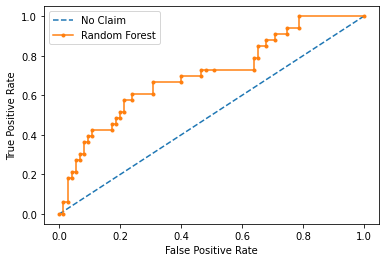

In [483]:
# plot the roc curve for the model
plt.plot(default_fpr, default_tpr, linestyle='--', label='No liver failure')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Logistic Regression

In [484]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=10_000_000)
classifier.fit(x_train, y_train)

LogisticRegression(max_iter=10000000, random_state=0)

In [485]:
y_pred = classifier.predict(x_test)

In [486]:
accuracy_score(y_test, y_pred)

0.7037037037037037

In [487]:
# generate a no claim prediction (majority class)
default_probs = [0 for _ in range(len(y_test))]

In [488]:
#Probabilities of the predictions
lr_prob = classifier.predict_proba(x_test)

In [489]:
lr_prob = lr_prob[:,1]

In [490]:
default_auc = roc_auc_score(y_test, default_probs)
lr_auc = roc_auc_score(y_test, lr_prob)

In [491]:
# summarize scores
print('No Claim: ROC AUC=%.3f' % (default_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))

No Claim: ROC AUC=0.500
Logistic Regression: ROC AUC=0.731


In [492]:
# calculate roc curves
default_fpr, default_tpr, _ = roc_curve(y_test, default_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, lr_prob)

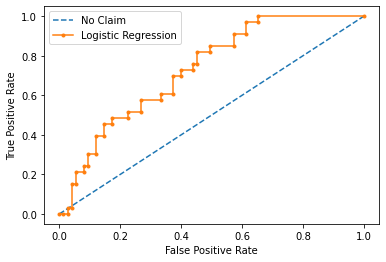

In [493]:
# plot the roc curve for the model
plt.plot(default_fpr, default_tpr, linestyle='--', label='No liver failure')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Logistic Regression')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Gradient Boost

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100_000, learning_rate=1.0,max_depth=10, random_state=0).fit(x_train, y_train)

In [38]:
y_pred = clf.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]]


In [39]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[75  0]
 [31  2]]


0.7129629629629629

In [40]:
# generate a no claim prediction (majority class)
default_probs = [0 for _ in range(len(y_test))]

#Probabilities of the predictions
GB_prob = clf.predict_proba(x_test)

#We will use probabilities for the positive class only
GB_prob = GB_prob[:,1]

default_auc = roc_auc_score(y_test, default_probs)
GB_auc = roc_auc_score(y_test, GB_prob)

In [41]:
# summarize scores
print('No Claim: ROC AUC=%.3f' % (default_auc))
print('Gradient Boost : ROC AUC=%.3f' % (GB_auc))

No Claim: ROC AUC=0.500
Gradient Boost : ROC AUC=0.676


In [42]:
# calculate roc curves
default_fpr, default_tpr, _ = roc_curve(y_test, default_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, GB_prob)

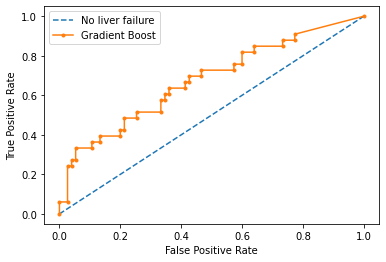

In [43]:
# plot the roc curve for the model
plt.plot(default_fpr, default_tpr, linestyle='--', label='No liver failure')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Gradient Boost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Naive bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [46]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]]


In [47]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[36 39]
 [ 5 28]]


0.5925925925925926

In [49]:
default_probs = [0 for _ in range(len(y_test))]

#Probabilities of the predictions
NBG_prob = classifier.predict_proba(x_test)

#We will use probabilities for the positive class only
NBG_prob = NBG_prob[:,1]

default_auc = roc_auc_score(y_test, default_probs)
NBG_auc = roc_auc_score(y_test, NBG_prob)

In [50]:
# summarize scores
print('No Claim: ROC AUC=%.3f' % (default_auc))
print('Naive Bayes GaussianNB : ROC AUC=%.3f' % (NBG_auc))

No Claim: ROC AUC=0.500
Naive Bayes GaussianNB : ROC AUC=0.711


In [51]:
# calculate roc curves
default_fpr, default_tpr, _ = roc_curve(y_test, default_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, NBG_prob)

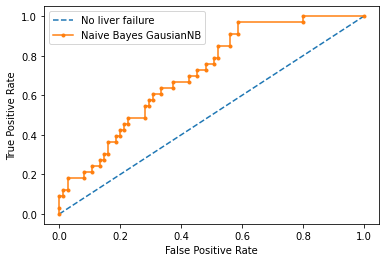

In [52]:
plt.plot(default_fpr, default_tpr, linestyle='--', label='No liver failure')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Naive Bayes GausianNB')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()